In [1]:
import numpy as np
import pandas as pd
import requests

In [2]:
# importing the contries
url ="https://api.worldbank.org/countries?format=json&per_page=300"

response= requests.get(url)
response.status_code

200

In [3]:
data=response.json()
print(data[0]) #metadata (info about the response itself, like how many total results exist)
print(data[1]) #actual data

{'page': 1, 'pages': 1, 'per_page': '300', 'total': 296}
[{'id': 'ABW', 'iso2Code': 'AW', 'name': 'Aruba', 'region': {'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Latin America & Caribbean '}, 'adminregion': {'id': '', 'iso2code': '', 'value': ''}, 'incomeLevel': {'id': 'HIC', 'iso2code': 'XD', 'value': 'High income'}, 'lendingType': {'id': 'LNX', 'iso2code': 'XX', 'value': 'Not classified'}, 'capitalCity': 'Oranjestad', 'longitude': '-70.0167', 'latitude': '12.5167'}, {'id': 'AFE', 'iso2Code': 'ZH', 'name': 'Africa Eastern and Southern', 'region': {'id': 'NA', 'iso2code': 'NA', 'value': 'Aggregates'}, 'adminregion': {'id': '', 'iso2code': '', 'value': ''}, 'incomeLevel': {'id': 'NA', 'iso2code': 'NA', 'value': 'Aggregates'}, 'lendingType': {'id': '', 'iso2code': '', 'value': 'Aggregates'}, 'capitalCity': '', 'longitude': '', 'latitude': ''}, {'id': 'AFG', 'iso2Code': 'AF', 'name': 'Afghanistan', 'region': {'id': 'MEA', 'iso2code': 'ZQ', 'value': 'Middle East, North Africa, Afghanistan & P

###Cleaning the Countries Data

In [4]:
countries=data[1]
countries=pd.DataFrame(countries)
countries.head()

,id,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Oranjestad,-70.0167,12.5167
1,AFE,ZH,Africa Eastern and Southern,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
2,AFG,AF,Afghanistan,"{'id': 'MEA', 'iso2code': 'ZQ', 'value': 'Midd...","{'id': 'MNA', 'iso2code': 'XQ', 'value': 'Midd...","{'id': 'LIC', 'iso2code': 'XM', 'value': 'Low ...","{'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}",Kabul,69.1761,34.5228
3,AFR,A9,Africa,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
4,AFW,ZI,Africa Western and Central,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,


## Cleaning Columns
Some columns like region, incomeLevel, lendingType were stored as nested dictionaries inside each cell


In [5]:
countries["region"][6] # we need value only

{'id': 'ECS', 'iso2code': 'Z7', 'value': 'Europe & Central Asia'}

In [6]:
countries["region"]=countries["region"].apply(lambda x: x["value"])

In [7]:
countries["region"]

,region
0,Latin America & Caribbean
1,Aggregates
2,"Middle East, North Africa, Afghanistan & Pakistan"
3,Aggregates
4,Aggregates
...,...
291,Aggregates
292,"Middle East, North Africa, Afghanistan & Pakistan"
293,Sub-Saharan Africa
294,Sub-Saharan Africa


In [8]:
countries["lendingType"][6] # we need value only

{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}

In [9]:
countries["lendingType"]= countries["lendingType"].apply(lambda x:x["value"])

In [10]:
countries["lendingType"]

,lendingType
0,Not classified
1,Aggregates
2,IDA
3,Aggregates
4,Aggregates
...,...
291,Aggregates
292,IDA
293,IBRD
294,IDA


In [11]:
countries["incomeLevel"]= countries["incomeLevel"].apply(lambda x:x["value"])

In [12]:
countries["incomeLevel"]

,incomeLevel
0,High income
1,Aggregates
2,Low income
3,Aggregates
4,Aggregates
...,...
291,Aggregates
292,Low income
293,Upper middle income
294,Lower middle income


In [13]:
## Removing unwanted columns:

In [14]:
countries.drop(columns=["adminregion","capitalCity"], inplace=True)

In [15]:
countries.head()

,id,iso2Code,name,region,incomeLevel,lendingType,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,High income,Not classified,-70.0167,12.5167
1,AFE,ZH,Africa Eastern and Southern,Aggregates,Aggregates,Aggregates,,
2,AFG,AF,Afghanistan,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,69.1761,34.5228
3,AFR,A9,Africa,Aggregates,Aggregates,Aggregates,,
4,AFW,ZI,Africa Western and Central,Aggregates,Aggregates,Aggregates,,


### Getting Indicators
**An indicator is a specific measurement that the World Bank tracks for countries over time.**

The World Bank tracks **over 26,000 indicators** covering economy, health, poverty, environment, etc.

**Each indicator has a unique code**

In [16]:
# code for indicators
base_url="https://api.worldbank.org/v2/indicators?format=json"
response= requests.get(base_url)
response.status_code

200

In [17]:
indicators_data = response.json()

In [18]:
indicators_data[0] # Meta data

{'page': 1, 'pages': 587, 'per_page': '50', 'total': 29323}

Indicators → `pages: 587` — data is spread across 525 pages so loop will be required to access them

In [19]:

indicators_data[1][0]#Actual data

{'id': '1.0.HCount.1.90usd',
 'name': 'Poverty Headcount ($1.90 a day)',
 'unit': '',
 'source': {'id': '37', 'value': 'LAC Equity Lab'},
 'sourceNote': 'The poverty headcount index measures the proportion of the population with daily per capita income (in 2011 PPP) below the poverty line.',
 'sourceOrganization': 'LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).',
 'topics': [{'id': '11', 'value': 'Poverty '}]}

In [20]:
all_dfs = []
first_url = "https://api.worldbank.org/v2/indicators?format=json&per_page=500&page=1"
first_response = requests.get(first_url).json()

total_pages = first_response[0]["pages"]
print(f"Total pages to fetch: {total_pages}")

for i in range(1, total_pages + 1):
    url = f"https://api.worldbank.org/v2/indicators?format=json&per_page=500&page={i}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()

        if len(data) < 2:
            print(f"No data at page {i}")

        indicators = data[1]
        df = pd.DataFrame([{"id": item["id"],
                            "name": item["name"]} for item in indicators])
        all_dfs.append(df)
        print(f"Page {i}: {len(df)} indicators collected")

    else:
        print(f"Failed to fetch page {i}, status code {response.status_code}")

Total pages to fetch: 59
Page 1: 500 indicators collected
Page 2: 500 indicators collected
Page 3: 500 indicators collected
Page 4: 500 indicators collected
Page 5: 500 indicators collected
Page 6: 500 indicators collected
Page 7: 500 indicators collected
Page 8: 500 indicators collected
Page 9: 500 indicators collected
Page 10: 500 indicators collected
Page 11: 500 indicators collected
Page 12: 500 indicators collected
Page 13: 500 indicators collected
Page 14: 500 indicators collected
Page 15: 500 indicators collected
Page 16: 500 indicators collected
Page 17: 500 indicators collected
Page 18: 500 indicators collected
Page 19: 500 indicators collected
Page 20: 500 indicators collected
Page 21: 500 indicators collected
Page 22: 500 indicators collected
Page 23: 500 indicators collected
Page 24: 500 indicators collected
Page 25: 500 indicators collected
Page 26: 500 indicators collected
Page 27: 500 indicators collected
Page 28: 500 indicators collected
Page 29: 500 indicators collecte

In [21]:
print(len(all_dfs))
print(all_dfs)


59
[                                 id  \
0                1.0.HCount.1.90usd   
1                 1.0.HCount.2.5usd   
2              1.0.HCount.Mid10to50   
3                   1.0.HCount.Ofcl   
4               1.0.HCount.Poor4uds   
..                              ...   
495          5.2.1_SLE.BAS.AID.DFID   
496          5.2.1_TJK.BAS.AID.AGAK   
497  5.2.1_TLS.TOT.AID.AUSAID.CFAUS   
498          5.2.1_VNM.BAS.AID.CIDA   
499           5.2.1_ZMB.BAS.AID.DNK   

                                                  name  
0                      Poverty Headcount ($1.90 a day)  
1                      Poverty Headcount ($2.50 a day)  
2                Middle Class ($10-50 a day) Headcount  
3              Official Moderate Poverty Rate-National  
4                         Poverty Headcount ($4 a day)  
..                                                 ...  
495   International aid disbursed to basic educatio...  
496   International aid disbursed to basic educatio...  
497   Internat

In [22]:
final_df = pd.concat(all_dfs,ignore_index=True)

In [23]:
final_df

,id,name
0,1.0.HCount.1.90usd,Poverty Headcount ($1.90 a day)
1,1.0.HCount.2.5usd,Poverty Headcount ($2.50 a day)
2,1.0.HCount.Mid10to50,Middle Class ($10-50 a day) Headcount
3,1.0.HCount.Ofcl,Official Moderate Poverty Rate-National
4,1.0.HCount.Poor4uds,Poverty Headcount ($4 a day)
...,...,...
29318,ytil_some_dfcl_all,Youth idle rate (% of persons with some degree...
29319,ytil_some_dfcl_fem,Youth idle rate (% of female persons with some...
29320,ytil_some_dfcl_male,Youth idle rate (% of male persons with some d...
29321,ytil_some_dfcl_rur,Youth idle rate (% of persons living in rural ...


In [24]:
final_df.to_csv("final_df.csv")

**countries** → WHO    (which countries exist, their region, income level)
**indicators**   → WHAT   (which measurements exist, their codes and names)


> But we don't have the actual numbers yet.

* Step 1 → Choosing specific indicators
          (not all 26,223 — just the useful ones like GDP, life expectancy etc.)

* Step 2 → Fetching the actual values for those indicators
          (hitting a different API endpoint that returns real numbers)

* Step 3 → Combining that data with the countries table
          (so each number knows which country, region, income level it belongs to)

* Step 4 → Save everything into clean, separate DataFrames
          (one for health, one for economy, one for trade etc.)



In [25]:
indicator_groups = {
"economic_activity_growth": [
"NY.GDP.MKTP.KD.ZG", # GDP growth (annual %)
"NY.GDP.PCAP.CD" # GDP per capita (current US$)
],
"labour_market_indicators": [
"SL.UEM.TOTL.ZS", # Unemployment total
"SL.UEM.1524.ZS", # Unemployment youth total (ages 15–24)
"SL.TLF.TOTL.IN" # Labour force, total
],
"trade_globalization": [
"NE.EXP.GNFS.CD", # Exports of goods and services (current US$)
"NE.IMP.GNFS.CD" # Imports of goods and services (current US$)
],
"poverty_inequality": [
"SI.POV.NAHC", # Poverty headcount ratio at national poverty lines (% of population)
"SI.POV.GINI" # Gini index (measure of income inequality)
],
"environmental_indicators": [
"EG.FEC.RNEW.ZS", # Renewable energy consumption (% of total final energy consumption)
"AG.LND.FRST.ZS" # Forest area (% of land area)
],
"health_indicators": [
"SP.DYN.LE00.IN", # Life expectancy at birth
"SP.DYN.IMRT.IN", # Infant mortality rate
"SH.H2O.BASW.ZS", # Access to at least basic water services (% of population)
"SH.XPD.CHEX.GD.ZS", # Current health expenditure (% of GDP)
"SH.IMM.IDPT", # Immunization, DPT (% of children ages 12–23 months)
"SH.IMM.MEAS", # Immunization, measles (% of children ages 12–23 months)
"SH.MMR.RISK.ZS", # Risk of maternal death
"SH.DTH.COMM.ZS", # Deaths from communicable diseases (% of total)
"SH.TBS.INCD", # Tuberculosis incidence (per 100,000 people)
"SH.STA.BRTC.ZS", # Births attended by skilled health staff (%)
"SH.STA.MMRT", # Maternal mortality ratio (modeled estimate, per 100,000 live births)
"SP.POP.65UP.TO.ZS", # Population ages 65 and above (% of total population)
"SH.HIV.INCD.ZS" # HIV incidence rate (per 1,000 uninfected population ages 15–49)
],
"technology_indicators": [
"IT.NET.USER.ZS", # Individuals using the Internet (% of population)
"IT.CEL.SETS.P2" # Mobile cellular subscriptions (per 100 people)
]}

In [26]:
indicator_groups.items()

dict_items([('economic_activity_growth', ['NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.CD']), ('labour_market_indicators', ['SL.UEM.TOTL.ZS', 'SL.UEM.1524.ZS', 'SL.TLF.TOTL.IN']), ('trade_globalization', ['NE.EXP.GNFS.CD', 'NE.IMP.GNFS.CD']), ('poverty_inequality', ['SI.POV.NAHC', 'SI.POV.GINI']), ('environmental_indicators', ['EG.FEC.RNEW.ZS', 'AG.LND.FRST.ZS']), ('health_indicators', ['SP.DYN.LE00.IN', 'SP.DYN.IMRT.IN', 'SH.H2O.BASW.ZS', 'SH.XPD.CHEX.GD.ZS', 'SH.IMM.IDPT', 'SH.IMM.MEAS', 'SH.MMR.RISK.ZS', 'SH.DTH.COMM.ZS', 'SH.TBS.INCD', 'SH.STA.BRTC.ZS', 'SH.STA.MMRT', 'SP.POP.65UP.TO.ZS', 'SH.HIV.INCD.ZS']), ('technology_indicators', ['IT.NET.USER.ZS', 'IT.CEL.SETS.P2'])])

In [27]:
for i, j in indicator_groups.items():
    print(j)
    print(i)
    print()

['NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.CD']
economic_activity_growth

['SL.UEM.TOTL.ZS', 'SL.UEM.1524.ZS', 'SL.TLF.TOTL.IN']
labour_market_indicators

['NE.EXP.GNFS.CD', 'NE.IMP.GNFS.CD']
trade_globalization

['SI.POV.NAHC', 'SI.POV.GINI']
poverty_inequality

['EG.FEC.RNEW.ZS', 'AG.LND.FRST.ZS']
environmental_indicators

['SP.DYN.LE00.IN', 'SP.DYN.IMRT.IN', 'SH.H2O.BASW.ZS', 'SH.XPD.CHEX.GD.ZS', 'SH.IMM.IDPT', 'SH.IMM.MEAS', 'SH.MMR.RISK.ZS', 'SH.DTH.COMM.ZS', 'SH.TBS.INCD', 'SH.STA.BRTC.ZS', 'SH.STA.MMRT', 'SP.POP.65UP.TO.ZS', 'SH.HIV.INCD.ZS']
health_indicators

['IT.NET.USER.ZS', 'IT.CEL.SETS.P2']
technology_indicators



In [28]:
import time
base_url="https://api.worldbank.org/countries/all/indicators/{}?format=json&per_page=1000&page={}"


category_dataframes={}
for category,indicators  in indicator_groups.items():
  print(f"Fetch information  for category:{category}")
  all_dfs_for_category=[] # reset basket for each new category


  for indicator_code in indicators:
    print(f"Fetching indicator: {indicator_code}")
    page=1

    while True:
      url = base_url.format(indicator_code, page)
      reponse= requests.get(url)
      if response.status_code!=200:
        print(f"No data for indicator{indicator_code} on page {page}")
        break

      data = reponse.json()
      if len(data)<2: #if response doesn't have both metadata and actual data
        print(f"failed at page{page}")
        break

      total_pages = data[0]["pages"]
      record= data[1]

      df= pd.json_normalize(record)
      df= df[[
          "country.id","country.value","indicator.id",
          "indicator.value","date","value"
          ]].rename(columns={
              "country.id":"country_id",
              "country.value":"country_value",
              "indicator.id":"indicator_id",
              "indicator.value":"indicator_name",
              "date":"year"
          })

      df= df[df["year"].astype(int)>2015]
      all_dfs_for_category.append(df)

      if page>=total_pages:
        break
      else:
        page+=1
        time.sleep(0.3)

  if all_dfs_for_category:
      combined_df= pd.concat(all_dfs_for_category, ignore_index=True)
      category_dataframes[category]=combined_df
      print(f"Total rows  collected for {category}:{len(combined_df)}")
  else:
      print(f"No data collected for {category}")


print("Data Fetching completed")




Fetch information  for category:economic_activity_growth
Fetching indicator: NY.GDP.MKTP.KD.ZG
Fetching indicator: NY.GDP.PCAP.CD
Total rows  collected for economic_activity_growth:4788
Fetch information  for category:labour_market_indicators
Fetching indicator: SL.UEM.TOTL.ZS
Fetching indicator: SL.UEM.1524.ZS
Fetching indicator: SL.TLF.TOTL.IN
Total rows  collected for labour_market_indicators:7182
Fetch information  for category:trade_globalization
Fetching indicator: NE.EXP.GNFS.CD
Fetching indicator: NE.IMP.GNFS.CD
Total rows  collected for trade_globalization:4788
Fetch information  for category:poverty_inequality
Fetching indicator: SI.POV.NAHC
Fetching indicator: SI.POV.GINI


/tmp/ipython-input-2673060914.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df= pd.concat(all_dfs_for_category, ignore_index=True)


Total rows  collected for poverty_inequality:4788
Fetch information  for category:environmental_indicators
Fetching indicator: EG.FEC.RNEW.ZS
Fetching indicator: AG.LND.FRST.ZS
Total rows  collected for environmental_indicators:4788
Fetch information  for category:health_indicators
Fetching indicator: SP.DYN.LE00.IN
Fetching indicator: SP.DYN.IMRT.IN
Fetching indicator: SH.H2O.BASW.ZS
Fetching indicator: SH.XPD.CHEX.GD.ZS
Fetching indicator: SH.IMM.IDPT
Fetching indicator: SH.IMM.MEAS
Fetching indicator: SH.MMR.RISK.ZS
Fetching indicator: SH.DTH.COMM.ZS
Fetching indicator: SH.TBS.INCD
Fetching indicator: SH.STA.BRTC.ZS
Fetching indicator: SH.STA.MMRT
Fetching indicator: SP.POP.65UP.TO.ZS
Fetching indicator: SH.HIV.INCD.ZS
Total rows  collected for health_indicators:31122
Fetch information  for category:technology_indicators
Fetching indicator: IT.NET.USER.ZS
Fetching indicator: IT.CEL.SETS.P2
Total rows  collected for technology_indicators:4788
Data Fetching completed


In [29]:
category_dataframes["economic_activity_growth"] #category_dataframes is a dictionary with 7 DataFrames inside it

,country_id,country_value,indicator_id,indicator_name,year,value
0,ZH,Africa Eastern and Southern,NY.GDP.MKTP.KD.ZG,GDP growth (annual %),2024,2.763839
1,ZH,Africa Eastern and Southern,NY.GDP.MKTP.KD.ZG,GDP growth (annual %),2023,1.931160
2,ZH,Africa Eastern and Southern,NY.GDP.MKTP.KD.ZG,GDP growth (annual %),2022,3.722717
3,ZH,Africa Eastern and Southern,NY.GDP.MKTP.KD.ZG,GDP growth (annual %),2021,4.578772
4,ZH,Africa Eastern and Southern,NY.GDP.MKTP.KD.ZG,GDP growth (annual %),2020,-2.817572
...,...,...,...,...,...,...
4783,ZW,Zimbabwe,NY.GDP.PCAP.CD,GDP per capita (current US$),2020,2059.674454
4784,ZW,Zimbabwe,NY.GDP.PCAP.CD,GDP per capita (current US$),2019,2184.329239
4785,ZW,Zimbabwe,NY.GDP.PCAP.CD,GDP per capita (current US$),2018,2270.895319
4786,ZW,Zimbabwe,NY.GDP.PCAP.CD,GDP per capita (current US$),2017,3445.449410


In [30]:
economic_activity= category_dataframes.get("economic_activity_growth", pd.DataFrame())
labour_market_jobs= category_dataframes.get("labour_market_indicators", pd.DataFrame())
trade_globalization= category_dataframes.get("trade_globalization", pd.DataFrame())
poverty_inequality= category_dataframes.get("poverty_inequality", pd.DataFrame())
environmental_indicators= category_dataframes.get("environmental_indicators", pd.DataFrame())
health_indicators= category_dataframes.get("health_indicators", pd.DataFrame())
technology_indicators= category_dataframes.get("technology_indicators", pd.DataFrame())

In [31]:
countries.rename(columns={"iso2Code":"country_id"}, inplace=True)

In [32]:
economic= pd.merge(economic_activity, countries, on ="country_id", how="inner")
labour_market = pd.merge(labour_market_jobs, countries, on ="country_id", how="inner")
trade= pd.merge(trade_globalization, countries, on ="country_id", how="inner")
poverty= pd.merge(poverty_inequality, countries, on ="country_id", how="inner")
environment= pd.merge(environmental_indicators, countries, on ="country_id", how="inner")
health=pd.merge(health_indicators, countries, on ="country_id", how="inner")
technology=pd.merge(technology_indicators, countries, on ="country_id", how="inner")

##  Removing Unnecessary Columns

In [33]:
economic.drop(columns=["indicator_id","name","id"], inplace=True)
trade.drop(columns=["indicator_id","name","id"], inplace=True)
labour_market.drop(columns=["indicator_id","name","id"], inplace=True)
poverty.drop(columns=["indicator_id","name","id"], inplace=True)
environment.drop(columns=["indicator_id","name","id"], inplace=True)
health.drop(columns=["indicator_id","name","id"], inplace=True)
technology.drop(columns=["indicator_id","name","id"], inplace=True)

In [34]:
health

,country_id,country_value,indicator_name,year,value,region,incomeLevel,lendingType,longitude,latitude
0,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2024,NaN,Aggregates,Aggregates,Aggregates,,
1,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2023,65.146154,Aggregates,Aggregates,Aggregates,,
2,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2022,64.487020,Aggregates,Aggregates,Aggregates,,
3,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2021,62.979999,Aggregates,Aggregates,Aggregates,,
4,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2020,63.766484,Aggregates,Aggregates,Aggregates,,
...,...,...,...,...,...,...,...,...,...,...
31117,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2020,1.900000,Sub-Saharan Africa,Lower middle income,Blend,31.0672,-17.8312
31118,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2019,2.300000,Sub-Saharan Africa,Lower middle income,Blend,31.0672,-17.8312
31119,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2018,2.700000,Sub-Saharan Africa,Lower middle income,Blend,31.0672,-17.8312
31120,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2017,3.600000,Sub-Saharan Africa,Lower middle income,Blend,31.0672,-17.8312


In [35]:
economic.to_csv("economic.csv")
trade.to_csv("trade.csv")
labour_market.to_csv("labour_market.csv")
poverty.to_csv("poverty.csv")
environment.to_csv("environment.csv")
health.to_csv("health.csv")
technology.to_csv("technology.csv")

print("All files saved successfully!")

All files saved successfully!


# Interrelationships among health indicators

In [36]:
health

,country_id,country_value,indicator_name,year,value,region,incomeLevel,lendingType,longitude,latitude
0,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2024,NaN,Aggregates,Aggregates,Aggregates,,
1,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2023,65.146154,Aggregates,Aggregates,Aggregates,,
2,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2022,64.487020,Aggregates,Aggregates,Aggregates,,
3,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2021,62.979999,Aggregates,Aggregates,Aggregates,,
4,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2020,63.766484,Aggregates,Aggregates,Aggregates,,
...,...,...,...,...,...,...,...,...,...,...
31117,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2020,1.900000,Sub-Saharan Africa,Lower middle income,Blend,31.0672,-17.8312
31118,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2019,2.300000,Sub-Saharan Africa,Lower middle income,Blend,31.0672,-17.8312
31119,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2018,2.700000,Sub-Saharan Africa,Lower middle income,Blend,31.0672,-17.8312
31120,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2017,3.600000,Sub-Saharan Africa,Lower middle income,Blend,31.0672,-17.8312


In [37]:
df_wide = health.pivot_table(index=["country_value","year"],
                             columns="indicator_name",
                             values="value"
                             )

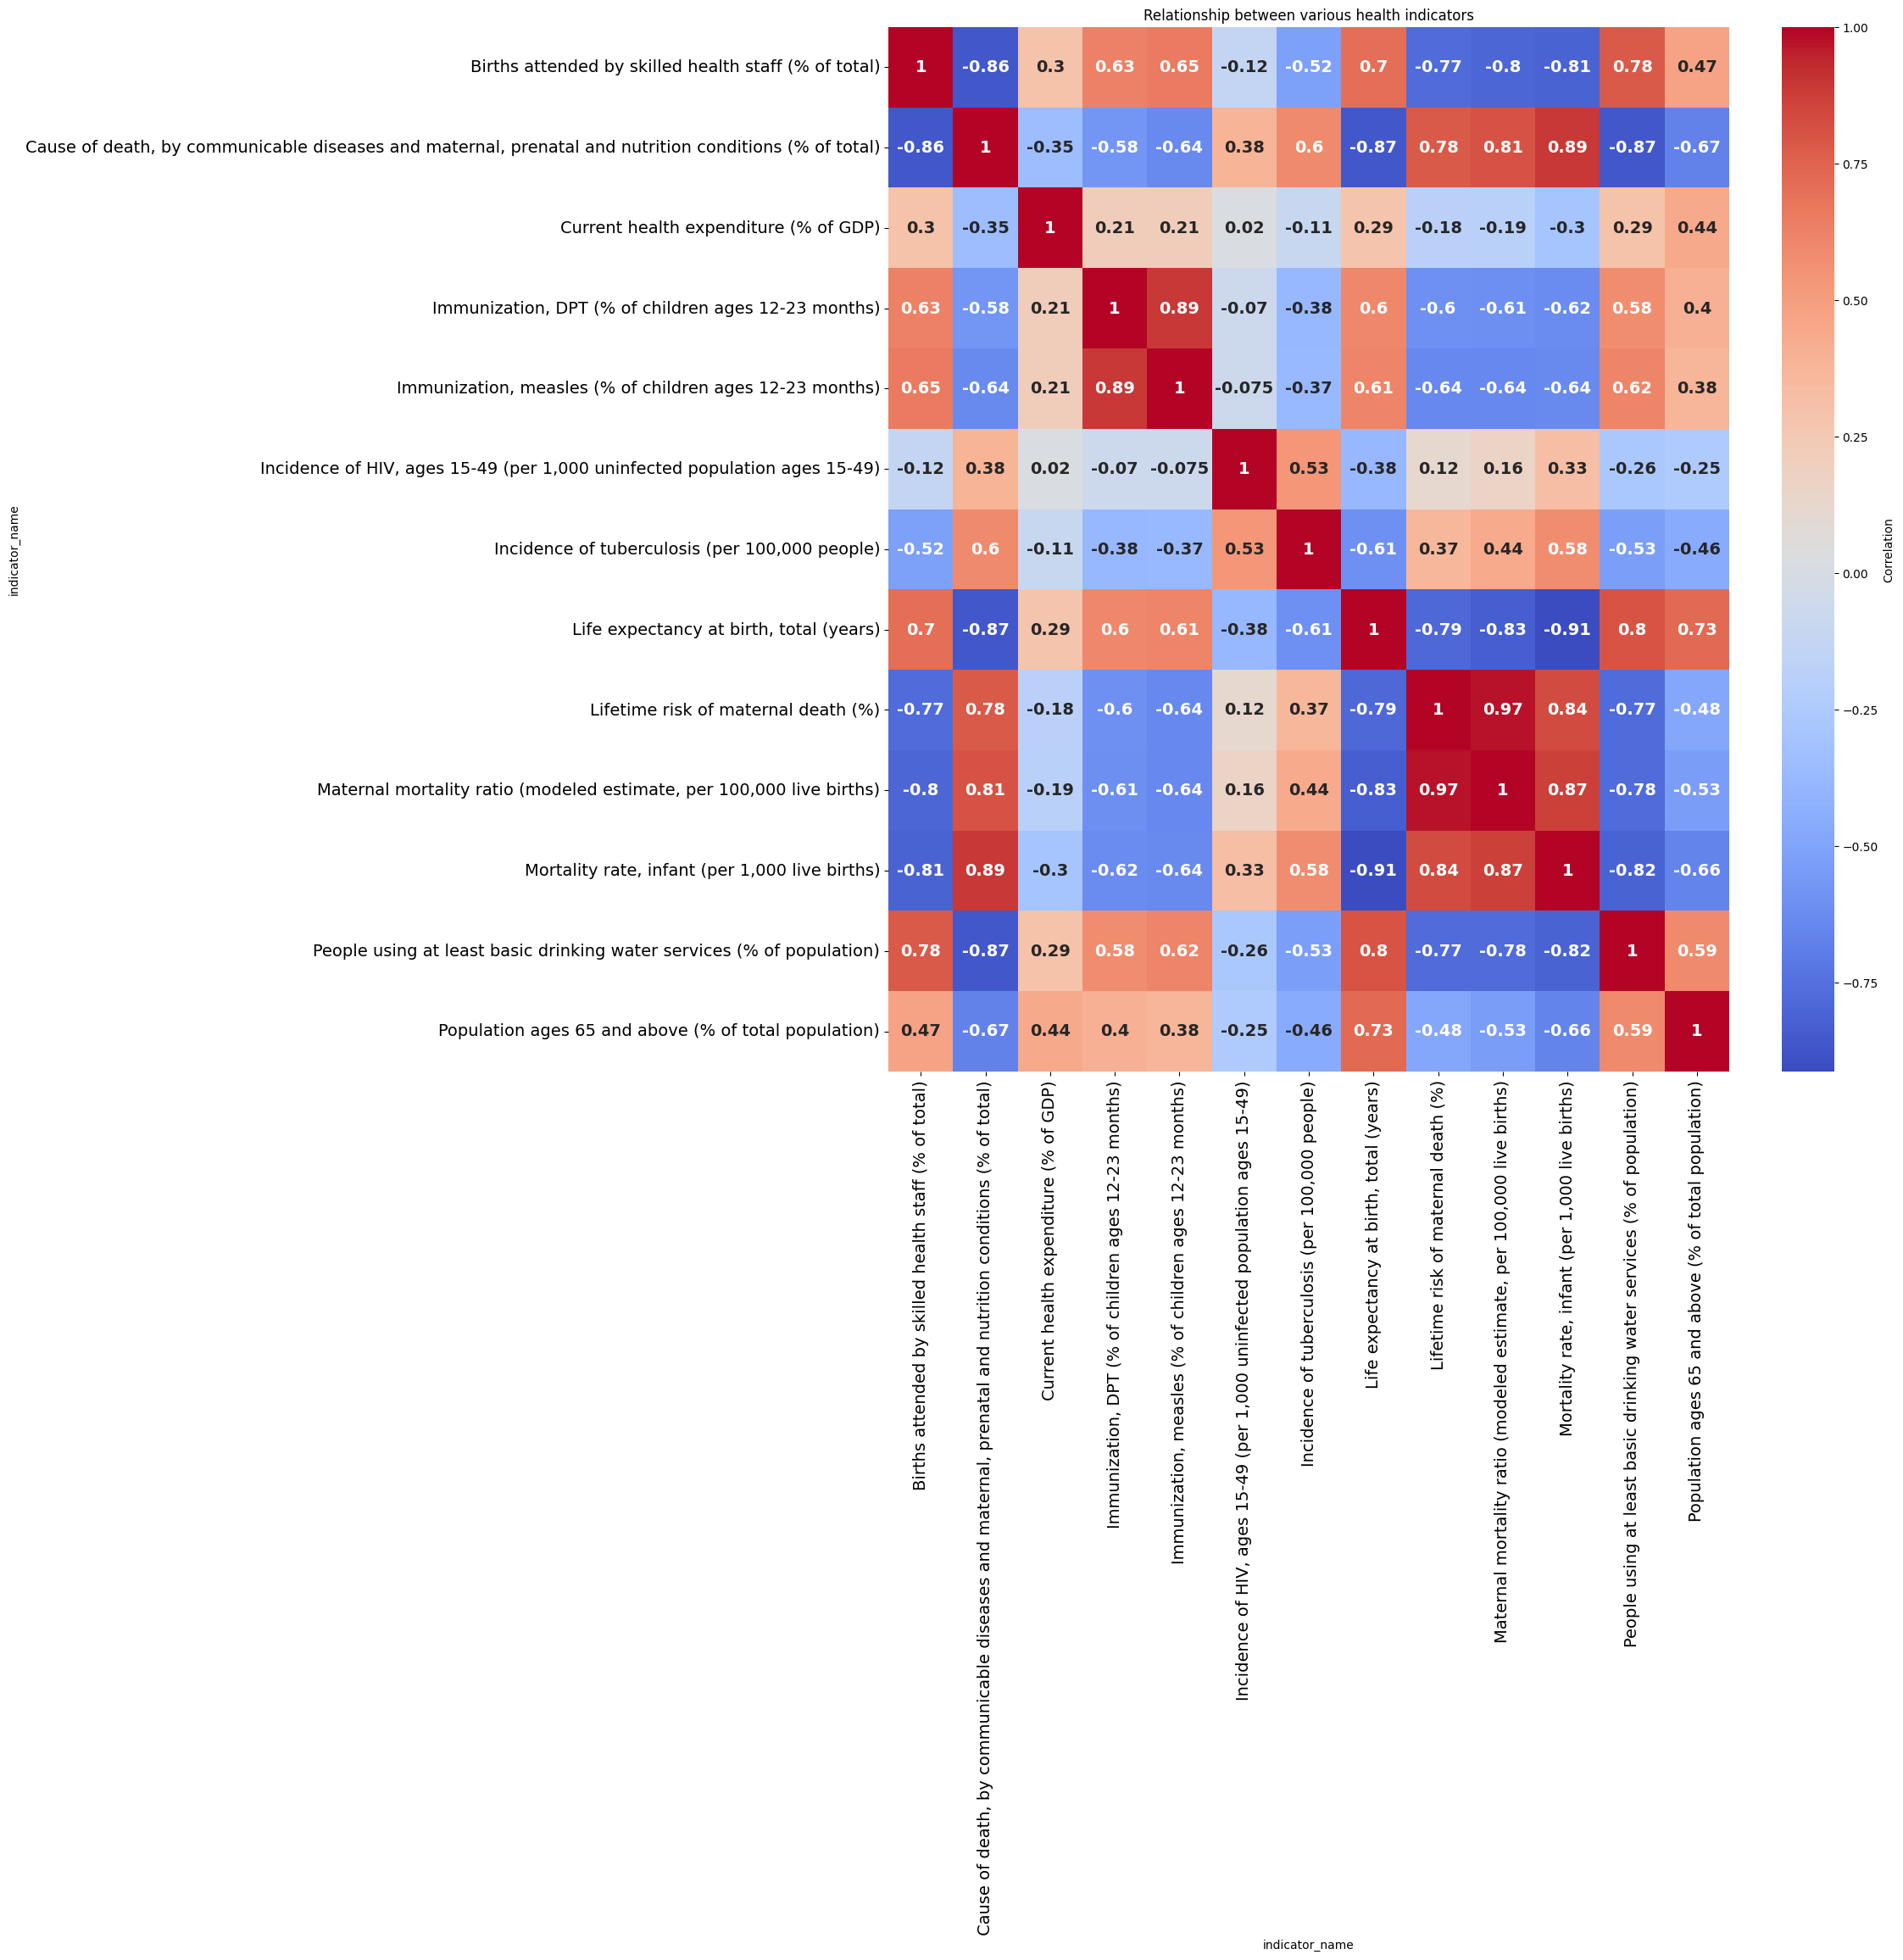

In [38]:
df_wide = health.pivot_table(index=["country_value","year"],
                             columns="indicator_name",
                             values="value"
                             )
corr= df_wide.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16), facecolor="none")
ax= sns.heatmap(
    corr,
    annot=True,
    cmap= "coolwarm",
    cbar_kws= {"label":"Correlation"},
    annot_kws= {"fontsize":14, "fontweight":"bold"}
)
plt.title("Relationship between various health indicators")

ax.tick_params(axis="x",labelsize=14)
ax.tick_params(axis="y",labelsize=14)
plt.show()

# Relationship between spending and life expectancy


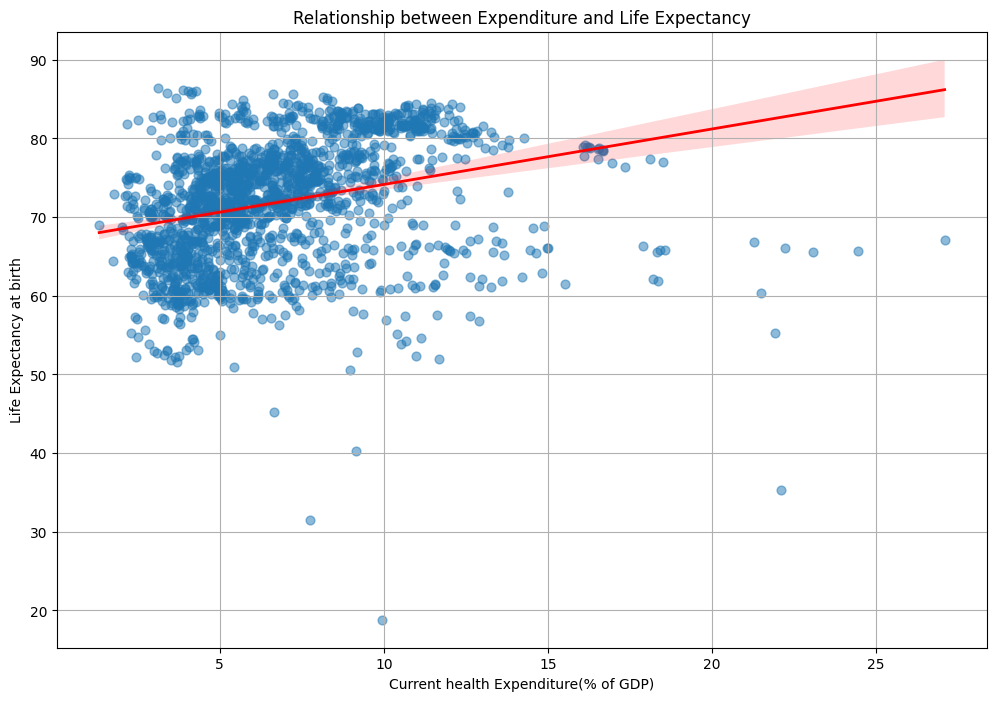

In [39]:
df_pivot= health.pivot(index=["country_value", "year"], columns="indicator_name", values="value").reset_index()

plt.figure(figsize=(12,8), facecolor="none")

ax=sns.regplot(data=df_pivot,
               x="Current health expenditure (% of GDP)",
               y="Life expectancy at birth, total (years)",
               scatter_kws= {"alpha":0.5, "s":40},
               line_kws={"color":"red","lw":2}
               )

plt.title("Relationship between Expenditure and Life Expectancy")
plt.xlabel("Current health Expenditure(% of GDP)")
plt.ylabel("Life Expectancy at birth")
plt.grid(True)
plt.show()